In [4]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
%matplotlib inline

In [5]:
female = glob("./dataset/female/*.jpg")
male = glob("./dataset/male/*.jpg")
#path = female + male
male = male[::5]
female=female[::5]
path = male+female

In [11]:
def getsize(path):
    img = Image.open(path)
    return (img.size[0])

def img_resize(path):
    img = Image.open(path)
    img.resize((273,273))
    return img

In [12]:
df = pd.DataFrame(data=path,columns=["path"])
df.tail()

,path
9398,./dataset/female\202544.jpg.jpg
9399,./dataset/female\202556.jpg.jpg
9400,./dataset/female\202564.jpg.jpg
9401,./dataset/female\202584.jpg.jpg
9402,./dataset/female\202594.jpg.jpg


In [13]:
df["size"] = df["path"].apply(getsize)

In [15]:
df.describe()

,size
count,9403.000000
mean,82.932256
std,4.820539
min,61.000000
25%,80.000000
50%,83.000000
75%,86.000000
max,106.000000


## minimum size 75 and max 100

In [27]:
df_new = df[df["size"]  > 75]

In [29]:
df_new.head()

,path,size
0,./dataset/male\090544.jpg.jpg,87
1,./dataset/male\090557.jpg.jpg,87
2,./dataset/male\090570.jpg.jpg,80
3,./dataset/male\090581.jpg.jpg,81
4,./dataset/male\090597.jpg.jpg,82


In [41]:
def return_gender(string):
    try:
        return string.split("/")[-1].split("\\")[0]
    except:
        return None

In [45]:
df["gender"] = df["path"].apply(return_gender)

In [55]:
df["gender"].value_counts()

male      4754
female    4649
Name: gender, dtype: int64

In [59]:
print(df["gender"].value_counts(normalize=True))


male      0.505583
female    0.494417
Name: gender, dtype: float64


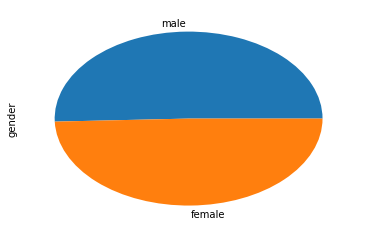

In [60]:
df["gender"].value_counts().plot(kind="pie")
plt.show()

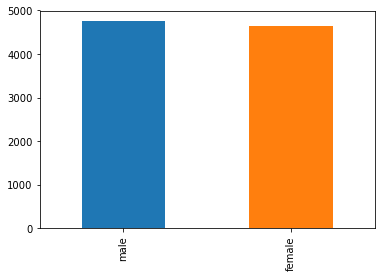

In [61]:
df["gender"].value_counts().plot(kind="bar")
plt.show()

In [67]:
print("minimum width : {}".format(df_new["size"].min()))
print("maximum width : {}".format(df_new["size"].max()))

minimum width : 76
maximum width : 106


#### Change size to 90 x 90

In [68]:
def resize_img(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_re = cv2.resize(gray,(100,100))
    return gray_re.flatten()

In [76]:
path = df["path"][0]
resize_img(path)

array([13, 12, 11, ...,  0,  0,  0], dtype=uint8)

In [87]:
df_new.tail()

,path,size,gender
9398,./dataset/female\202544.jpg.jpg,83,female
9399,./dataset/female\202556.jpg.jpg,89,female
9400,./dataset/female\202564.jpg.jpg,90,female
9401,./dataset/female\202584.jpg.jpg,86,female
9402,./dataset/female\202594.jpg.jpg,85,female


In [88]:
df_new["gender"] = df_new["path"].apply(return_gender)

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
#resizing image
df_new["structure"] = df_new["path"].apply(resize_img)

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
df_new.head()

,path,size,gender,structure
0,./dataset/male\090544.jpg.jpg,87,male,"[13, 12, 11, 10, 10, 9, 8, 6, 3, 3, 2, 1, 2, 3..."
1,./dataset/male\090557.jpg.jpg,87,male,"[36, 31, 28, 29, 26, 22, 27, 30, 27, 30, 35, 4..."
2,./dataset/male\090570.jpg.jpg,80,male,"[16, 16, 16, 16, 15, 15, 18, 21, 23, 22, 24, 2..."
3,./dataset/male\090581.jpg.jpg,81,male,"[158, 151, 152, 155, 155, 153, 162, 161, 160, ..."
4,./dataset/male\090597.jpg.jpg,82,male,"[138, 138, 141, 144, 144, 144, 143, 137, 132, ..."


In [97]:
df1 = df_new["structure"].apply(pd.Series)


In [104]:
df2 = pd.concat((df_new["gender"],df1),axis=1)

In [106]:
df2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,male,13,12,11,10,10,9,8,6,3,...,6,8,1,3,2,1,0,0,0,0
1,male,36,31,28,29,26,22,27,30,27,...,113,110,100,106,99,73,54,52,47,40
2,male,16,16,16,16,15,15,18,21,23,...,30,33,41,50,53,45,45,50,62,78
3,male,158,151,152,155,155,153,162,161,160,...,206,208,212,215,213,214,218,218,213,206
4,male,138,138,141,144,144,144,143,137,132,...,11,21,25,18,8,4,1,1,3,3


In [124]:
df2.loc[0][1:].values

array([13, 12, 11, ..., 0, 0, 0], dtype=object)

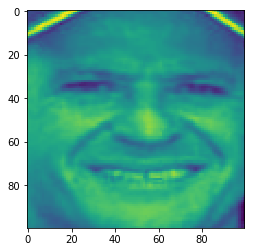

In [127]:
plt.imshow(df2.loc[67][1:].values.reshape(100,100).astype('int'))

In [129]:
import pickle

In [130]:
pickle.dump(df2,open("./dataset/image_dataframe.pkl","wb"))